In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Seleccionar la variable, años y porcentaje de completitud

In [2]:
var_etiquetas = ['TMX_CON', 'TMN_CON', 'PTPM_CON', 'Q_MN_D', 'Q_MEDIA_D', 'Q_MX_D', 'PT_10_TT_D']

profile_variable =  'Q_MX_D'

year_ini = 2000
year_fin = 2019
variable_records_min_porc = 0.70

### Cargar archivos con los datos de las estaciones, los perfiles de las variables y la deforestación

In [3]:
cuencaestacion_path_base = r'../data/stations'
cuencaestacion_files_path = f'{cuencaestacion_path_base}/EST316C.csv'
print('Cuencas por estación:', cuencaestacion_files_path)

profiles_path_base = r'../data/variables_profiles'
profile_files_path = f'{profiles_path_base}/*{profile_variable}_estacion_year.csv'
print('Perfiles:', profile_files_path)

deforestacion_path = r'../data/variables/FCL316C.csv'
print('Deforestacion:', deforestacion_path)

Cuencas por estación: ../data/stations/EST316C.csv
Perfiles: ../data/variables_profiles/*Q_MX_D_estacion_year.csv
Deforestacion: ../data/variables/FCL316C.csv


In [4]:
cuencaestacion_files = glob.glob(cuencaestacion_files_path)
print(cuencaestacion_files)

profile_files = glob.glob(profile_files_path)
print(profile_files)

profile_files = glob.glob(profile_files_path)
print(profile_files)

['../data/stations/EST316C.csv']
['../data/variables_profiles\\limnigrafica_Q_MX_D_estacion_year.csv', '../data/variables_profiles\\limnimetrica_Q_MX_D_estacion_year.csv']
['../data/variables_profiles\\limnigrafica_Q_MX_D_estacion_year.csv', '../data/variables_profiles\\limnimetrica_Q_MX_D_estacion_year.csv']


In [5]:
cuencaestacion_dtypes = {
    'COD':'category',
    'CUENCA':'category'
}
cuencaestacion_cols = ['COD', 'CUENCA']

cuencaestacion = pd.concat([pd.read_csv(file, sep=';', dtype = cuencaestacion_dtypes, usecols = cuencaestacion_cols) for file in cuencaestacion_files], axis = 0)
#cuencaestacion.rename(columns=lambda x: x.lower(), inplace=True)
cuencaestacion.rename(columns = {'COD':'codigo', 'CUENCA':'cuenca'}, inplace = True)

cuencaestacion.set_index('codigo', inplace = True)
print(cuencaestacion.shape)
cuencaestacion.head()

(3818, 1)


,cuenca
codigo,
11017010,199
11027030,198
11027050,198
11037020,197
11047010,311


In [6]:
profile_dtypes = {
    'CodigoEstacion':'category'
}

profiles = pd.concat([pd.read_csv(file, dtype = profile_dtypes) for file in profile_files], axis = 0)
profiles.rename({'CodigoEstacion':'codigo'}, axis = 1, inplace = True)
profiles.rename(columns=lambda x: 'y' + x if x.isnumeric() else x, inplace=True)
profiles.set_index('codigo', inplace = True)
print(profiles.shape)
profiles.head()

(734, 30)


,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11027030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,258,329,364,365,149
11027040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11027050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,176,365,0
11037020,365,366,365,364,365,366,365,365,365,366,...,365,366,314,359,343,366,365,357,361,89
11047010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,349,364,363,365,30


### Unir perfiles con las estaciones-cuencas

In [7]:
estaciones = pd.concat([cuencaestacion, profiles], join = 'inner', axis = 1)
#estaciones[(~estaciones.cuenca.isnull()) & (~estaciones.y1991.isnull())].shape
print(estaciones.shape)
estaciones.head()

(515, 31)


,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020
codigo,,,,,,,,,,,,,,,,,,,,,
11017010,199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,345,364,365,358,75
11027030,198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,258,329,364,365,149
11027050,198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,176,365,0
11037020,197,365,366,365,364,365,366,365,365,365,...,365,366,314,359,343,366,365,357,361,89
11047010,311,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,349,364,363,365,30


### Calcular la completitud para cada estación

In [8]:
variable_records_min_days = int(365 * variable_records_min_porc)

cols_variable = ['y'+str(i) for i in range(year_ini, year_fin+1)]
print(f'Desde:{year_ini} hasta:{year_fin} %mín:{variable_records_min_porc} días mínimo:{variable_records_min_days}')
print(cols_variable)
estaciones[cols_variable].head()

Desde:2000 hasta:2019 %mín:0.7 días mínimo:255
['y2000', 'y2001', 'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007', 'y2008', 'y2009', 'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 'y2017', 'y2018', 'y2019']


,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019
codigo,,,,,,,,,,,,,,,,,,,,
11017010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,345,364,365,358
11027030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,329,364,365
11027050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,365
11037020,366,364,365,344,365,365,365,364,366,365,363,365,366,314,359,343,366,365,357,361
11047010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,349,364,363,365


In [9]:
variable_full = f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'
estaciones[variable_full] = estaciones[cols_variable].apply(lambda x: len(estaciones[cols_variable].columns[x > variable_records_min_days]) / len(cols_variable) , axis = 1)
estaciones.head()

,cuenca,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,Q_MX_D_70_porc
codigo,,,,,,,,,,,,,,,,,,,,,
11017010,199,0,0,0,0,0,0,0,0,0,...,0,0,0,0,345,364,365,358,75,0.20
11027030,198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,258,329,364,365,149,0.20
11027050,198,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,176,365,0,0.05
11037020,197,365,366,365,364,365,366,365,365,365,...,366,314,359,343,366,365,357,361,89,1.00
11047010,311,0,0,0,0,0,0,0,0,0,...,0,0,0,0,349,364,363,365,30,0.20


In [10]:
variable_completitud = f'{profile_variable}_{int(variable_records_min_porc * 100)}_compl'
estaciones[variable_completitud] = estaciones[variable_full].apply(lambda x: 1 if x == 1 else 0)
estaciones[variable_completitud].value_counts()

0    465
1     50
Name: Q_MX_D_70_compl, dtype: int64

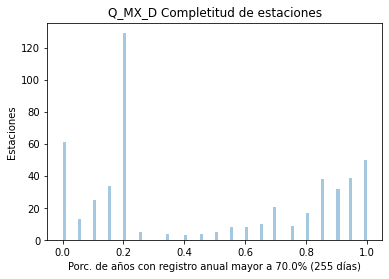

In [11]:
ax = sns.distplot(estaciones[variable_full], kde = False, bins = 100)
ax.set(xlabel = f'Porc. de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)', 
       ylabel = 'Estaciones', 
       title = f'{profile_variable} Completitud de estaciones')
p = f'{profiles_path_base}/CUM{int(variable_records_min_porc * 100)}_{profile_variable}_estaciones.png'
plt.savefig(p)

In [12]:
cuencas_completitud = estaciones.groupby('cuenca')[variable_full].max().reset_index() 

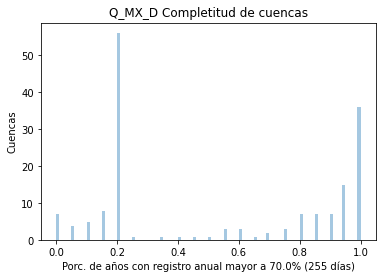

In [13]:
ax = sns.distplot(cuencas_completitud[variable_full], kde = False, bins = 100)
ax.set(xlabel = f'Porc. de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)', 
       ylabel = 'Cuencas', 
       title = f'{profile_variable} Completitud de cuencas')

p = f'{profiles_path_base}/CUM{int(variable_records_min_porc * 100)}_{profile_variable}_cuencas.png'
plt.savefig(p)

#plt.figure(figsize=(20, 6))
#ax = sns.barplot(x = 'cuenca', y = variable_full, data = cuencas_completitud)
#ax.set_xlabel('cuenca')

#ax.set(xlabel = 'cuenca', ylabel = '% años', 
#       title = f'{profile_variable} por Cuenca % de años con registro anual mayor a {variable_records_min_porc * 100}% ({variable_records_min_days} días)')
#sns.despine(left=True, bottom=True)

In [14]:

cuencas_completitud[variable_completitud] = cuencas_completitud[variable_full].apply(lambda x: 1 if x == 1 else 0)
print(f'Número de cuencas con al menos una estacion al {variable_records_min_porc * 100}% de años', cuencas_completitud[variable_completitud].value_counts()[1])


Número de cuencas con al menos una estacion al 70.0% de años 36


## Exportar las estaciones con el 100% de los años con al menos el `print(variable_records_min_porc)` de los días con registro por año.

In [15]:
completeness_files_path = f'{profiles_path_base}/CUM{int(variable_records_min_porc * 100)}_{profile_variable}.csv'
print('Completitud:', completeness_files_path)

estaciones_completeness = estaciones.loc[estaciones[f'{profile_variable}_{int(variable_records_min_porc * 100)}_porc'] == 1, ['cuenca']]
estaciones_completeness['variable'] = profile_variable

print(estaciones_completeness.shape)

#estaciones_completeness.to_csv(completeness_files_path)

Completitud: ../data/variables_profiles/CUM70_Q_MX_D.csv
(50, 2)
